In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib # This is for saving your final model

print("All training libraries imported successfully.")

All training libraries imported successfully.


In [2]:
# --- 1. LOAD THE DATA ---

try:
    data = pd.read_csv("audio_features.csv")
except FileNotFoundError:
    print("FATAL ERROR: audio_features.csv not found in this folder.")
    print("Please make sure it's in the same directory as this notebook.")

print(f"Data loaded. Total samples: {data.shape[0]}")
print(f"Total features: {data.shape[1] - 1}") # Subtract 1 for the 'label' column
print("\n--- Data Preview ---")
print(data.head())

Data loaded. Total samples: 56
Total features: 42

--- Data Preview ---
    label           0          1          2          3          4          5  \
0  Caline -334.505554  80.363083  31.960703  38.601078 -23.618664  34.220261   
1  Caline -260.563600  43.895285  31.947165  27.325303  -3.676716  17.533075   
2  Caline -364.707275  71.703117  40.607567  18.398798 -13.093484  25.410641   
3  Caline -369.101685  76.483719  32.255466  37.095928 -22.565018  32.748333   
4  Caline -378.706421  83.849281  20.367743  55.950260 -26.915783  31.403313   

           6          7          8  ...        32        33        34  \
0 -17.425180   8.843948   4.115203  ...  1.578511  3.304145  1.244644   
1  -8.202426   4.238915   5.444781  ...  1.083966  2.685566  1.075323   
2 -21.749084  17.807522  -9.590775  ...  2.000575  3.260718  2.635558   
3 -16.571386   7.898382   4.738630  ...  1.446112  3.388533  1.077742   
4  -2.822325  -5.623101  12.468597  ... -2.822278 -2.599113 -3.390220   

        

In [3]:
# --- 2. PREPARE DATA FOR MODELING ---

# 2a. Separate features (X) from the target (y)
X = data.drop('label', axis=1) # X = all columns EXCEPT 'label'
y = data['label']             # y = ONLY the 'label' column

# 2b. Encode the text labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("--- Label Encoding Map  ---")

for i, label in enumerate(le.classes_):
    print(f"{label}  ->  {i}")
print("---------------------------------")

--- Label Encoding Map  ---
Caline  ->  0
Keza  ->  1
SengaKabare  ->  2
Theodora  ->  3
---------------------------------


In [4]:
# --- 3. SPLIT DATA INTO TRAIN/TEST SETS ---

# We'll split 80% for training, 20% for testing.
# stratify=y_encoded is VITAL. It ensures that both the train and test sets
# get a fair percentage of samples from all speakers.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y_encoded)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} (~80%)")
print(f"Testing samples: {len(X_test)} (~20%)")

Total samples: 56
Training samples: 44 (~80%)
Testing samples: 12 (~20%)


In [5]:
# --- 4. TRAIN THE MODEL ---
print("Training the Random Forest model on 44 samples...")

# Initialize the model (as required by the assignment)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model!
model.fit(X_train, y_train)

print("Model training complete!")

Training the Random Forest model on 44 samples...
Model training complete!


Evaluating model performance on the 12 unseen test samples...

Model Accuracy: 91.67%

--- Classification Report (Includes F1-Score) ---
              precision    recall  f1-score   support

      Caline       1.00      1.00      1.00         3
        Keza       0.75      1.00      0.86         3
 SengaKabare       1.00      1.00      1.00         3
    Theodora       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.94      0.92      0.91        12
weighted avg       0.94      0.92      0.91        12


--- Confusion Matrix ---


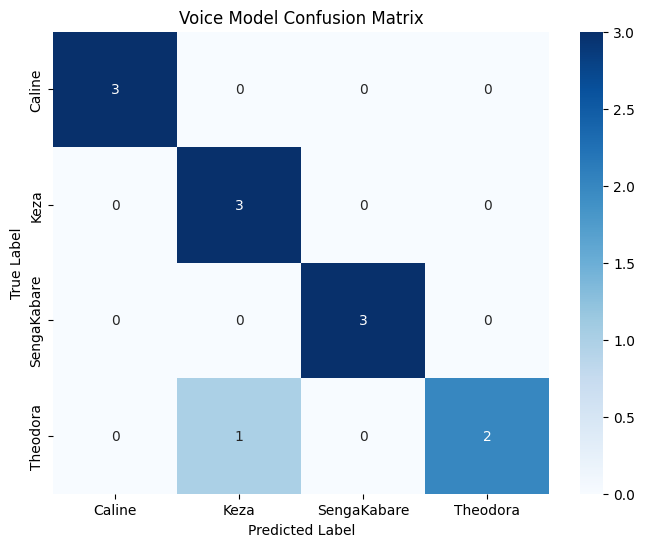

In [6]:
# --- 5. EVALUATE THE MODEL ---
print("Evaluating model performance on the 12 unseen test samples...")

# 5a. Make predictions on the test data
y_pred = model.predict(X_test)

# 5b. Get Accuracy and F1-Score (Classification Report)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\n--- Classification Report (Includes F1-Score) ---")
# This is a key part of your report.
# It uses the 'le' (LabelEncoder) from Cell 3 to show names, not numbers
try:
    target_names = le.classes_
    # Explicitly pass labels to ensure sklearn knows which labels to expect
    # This prevents issues when not all classes appear in test set
    labels = np.arange(len(le.classes_))
    print(classification_report(y_test, y_pred, labels=labels, target_names=target_names, zero_division=0))
except NameError:
    print("Warning: 'le' (LabelEncoder) not found. Displaying report with number labels.")
    print(classification_report(y_test, y_pred, zero_division=0))


# 5c. Show a Confusion Matrix (The best visualization)
print("\n--- Confusion Matrix ---")
# This shows where the model got confused (if at all)
cm = confusion_matrix(y_test, y_pred)

# We need to get the labels in the correct order for the plot
labels_for_plot = le.classes_ if 'le' in locals() else np.unique(y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels_for_plot, yticklabels=labels_for_plot)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Voice Model Confusion Matrix')
plt.show()

In [9]:
# --- 6. SAVE DELIVERABLES FOR INTEGRATION ---

# 6a. Save the trained model
model_filename = 'audio_model.pkl'
joblib.dump(model, model_filename)

# 6b. Save the Label Encoder
# CRITICAL: Person 4 needs this to turn "1" back into "Keza"!
encoder_filename = 'audio_label_encoder.pkl'
joblib.dump(le, encoder_filename)

print(f"Model saved to: {model_filename}")
print(f"Encoder saved to: {encoder_filename}")


Model saved to: audio_model.pkl
Encoder saved to: audio_label_encoder.pkl
